# Análisis Exploratorio de Datos (EDA).
Como primer medida comenzaremos con el EDA, para investigar y resumir los aspectos claves de los datos que disponemos. Utilizaremos diversas funciones y gráficos para explorar los datos y obtener una comprensión básica de los mismos. Lo iremos desglosando en distintos pasos.

Cabe mencionar que la consigna es realizar un modelo que permita predecir entre dos categorías: si la estancia en el hospital será prolongada o no.

#### Importación de librerías necesarias:

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Ingesta de los datasets
Contamos con dos archivos, uno *train* y otro *test*. De momento solo haremos la ingesta de *train* ya que es el archivo con el que trabajaremos mayormente. Más adelante ingestaremos *test*.

In [182]:
df_train = pd.read_csv('.\Datasets\hospitalizaciones_train.csv')

#### Análisis
Comenzamos a analizar el dataset.

Tomamos una muestra del dataset para visualizarlo:

In [183]:
df_train.sample(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
235438,2,radiotherapy,A,Dr Sam,3,49140,21-30,Male,Trauma,Moderate,None,2,Yes,5905.910976,22
266003,3,radiotherapy,E,Dr Sam,4,8706,21-30,Male,Trauma,Moderate,Other,8,Yes,3974.659658,21
331775,3,gynecology,D,Dr Sarah,7,19008,31-40,Female,Urgent,Minor,High Blood Pressure,2,Yes,5430.698018,10
164690,14,radiotherapy,A,Dr John,1,31263,41-50,Other,Trauma,Minor,Diabetes,8,Yes,4748.330616,5
26128,2,gynecology,F,Dr Olivia,2,90270,31-40,Female,Trauma,Moderate,None,4,Yes,2690.103904,9


Ahondamos en la estructura del mismo, su cantidad de filas y columnas y sus nombres:

In [184]:
print('Cantidad de Filas y Columnas de df_train:',df_train.shape)
print('Nombre columnas de df_train:',df_train.columns)

Cantidad de Filas y Columnas de df_train: (410000, 15)
Nombre columnas de df_train: Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit',
       'Stay (in days)'],
      dtype='object')


In [185]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

El dataset tiene 15 columnas y 410000 registros. No hay registros nulos.

Podemos observar a primera vista que hay pocas columnas cuantitativas, en comparación con las cualitativas, y parece por sus características que podría existir poca correlación entre ellas para realizar futuras predicciones. Por ejemplo, el id del paciente, el pago del depósito o el número de visitantes a priori no se relacionan con la necesidad de estadía de un paciente en un hospital. Esto lo veremos más adelante como así también seguiremos trabajando sobre las variables categóricas.

¿Hay registros duplicados?

In [186]:
df_train.duplicated().sum()

0

El dataset no posee registros duplicados.

¿Alguna columna posee valores faltantes?

In [187]:
df_train.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

No hay registros faltantes en ninguna columna.

#### Selección de características
Para este proyecto, en el Readme contamos con la descripción de las columnas de este dataset. Gracias a dicha información podemos inferir que hay dimensiones que no nos aportan datos que vayan a sernos útiles para desarrollar nuestro modelo. Para trabajar con un dataset más limpio vamos a eliminar dichas columnas. Las columnas a eliminar, y una breve descripción del porqué, son:

* Ward_Facility_Code: es un código de habitación, no influye en el estado del paciente.
* doctor_name: el doctor tampoco debería ser un factor que determine el estado del paciente. Puede que haya doctores que tiendan a internar por más tiempo a su paciente o a darle de alta más rápido. En la vida real no debería haber un sesgo.
* patientid: el identificador del paciente tampoco influye en su estado.
* Visitors with Patient: la cantidad de visitantes tampoco influye en el estado del paciente.
* Insurance: el seguro de salud no debería influir en el estado del paciente. Podría indicar que el paciente tiene un límite de cobertura, pero no sólo no se especifica la empresa aseguradora ni el plan de cobertura, sino que tampoco determina la necesidad de estadía.
* Admission_Deposit: el depósito inicial por los costos de internación no tiene relación el estado del paciente.

Contamos a su vez con algunas dimensiones que a priori es difícil saber a ciencia cierta si serán determinantes o no. Ellas son:
* Available Extra Rooms in Hospital: no es un factor que debería influir directamente en la necesidad de un paciente de permanecer hospitalizado. Pero puede ser un condicionante de la capacidad del hospital aunque tampoco discrimina el número de camas por habitación.
* Department: el área de atención a la que ingresa el paciente en principio podría ser irrelevante. Pero podría también ser un área que no tenga la suficiente cantidad de personal o de recursos, o poseer una política en particular que incida en la estadía del paciente.
* staff_available: la cantidad de personal disponible al momento del ingreso del paciente podría ser relevante o no, de acuerdo a la afección o gravedad del paciente.
* Type of Admission: el tipo de ingreso registrado podría ser relevante o no. Por ejemplo, una urgencia podría requerir de muchos días de estadía o podría también ser subsanada en el momento, dependiendo de qué tipo de urgencia se trate.
* health_conditions: los antecedentes pueden o no relacionarse al estado del paciente al ingreso, por ende puede o no influenciar en la estadía.

De momento no eliminaremos estas columnas ya que quizás posteriores análisis nos indiquen que son importantes para el modelo. Por si acaso mantendremos estos datos.

Seleccionamos las columnas a mantener:

In [188]:
df_train = df_train[['Available Extra Rooms in Hospital', 'Department', 'staff_available', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Stay (in days)']]

Ahora veremos los valores únicos, con foco en las columnas categóricas:

In [189]:
df_train.nunique()

Available Extra Rooms in Hospital    18
Department                            5
staff_available                      11
Age                                  10
gender                                3
Type of Admission                     3
Severity of Illness                   3
health_conditions                     6
Stay (in days)                       49
dtype: int64

In [190]:
dim = ['Department', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions']
for e in dim:
    print(f'Los valores únicos para la columna {e} y su cantidad son:')
    print(df_train[e].value_counts())


Los valores únicos para la columna Department y su cantidad son:
gynecology            281625
radiotherapy           69132
anesthesia             36250
TB & Chest disease     18825
surgery                 4168
Name: Department, dtype: int64
Los valores únicos para la columna Age y su cantidad son:
21-30     135029
31-40     106772
41-50      65973
11-20      36760
61-70      21781
51-60      17733
71-80      15384
81-90       6678
0-10        2753
91-100      1137
Name: Age, dtype: int64
Los valores únicos para la columna gender y su cantidad son:
Female    299502
Male       92605
Other      17893
Name: gender, dtype: int64
Los valores únicos para la columna Type of Admission y su cantidad son:
Trauma       254698
Emergency    111374
Urgent        43928
Name: Type of Admission, dtype: int64
Los valores únicos para la columna Severity of Illness y su cantidad son:
Moderate    230819
Minor       107897
Extreme      71284
Name: Severity of Illness, dtype: int64
Los valores únicos para la 

Para cada valor existen registros múltiples aunque en algunos casos están desbalanceados. Por ejemplo, para *gender* vemos que tenemos más del triple de registros femeninos. Igualmente no haremos modificaciones en estas columnas.

La columna *health_conditions* es cuestionable. Tenemos muchos registros con valor None y también con Other (otro). No sabemos si esos None son porque los pacientes no tienen antecedentes previos o porque el hospital no los tiene registrados con anterioridad. Tampoco sabemos la composición de Other. Podría tratarse de muchas cosas diferentes. Vamos a eliminar esta columna porque considero que puede llegar a 'ensuciar' el modelo y eliminar esos registros o intentar reemplarlos no considero que sea pertinente ya que suman aproximadamente la mitad de todos los registros.

In [191]:
df_train.drop(columns=['health_conditions'], inplace=True)

Comenzaremos a reemplazar los valores categóricos por valores numéricos para que puedan ser utilizados por el modelo:

A la columna dias_estadia le asignamos 0 (cero) para valores inferiores o iguales a 8 (ocho), y 1 (uno) para valores mayores a 8 (ocho). Si un registro es igual a 1 (uno) significa que se trata de una estadía prolongada.

In [192]:
df_train.loc[df_train['Stay (in days)'] <= 8, 'Stay (in days)'] = 0
df_train.loc[df_train['Stay (in days)'] > 8, 'Stay (in days)'] = 1
df_train.rename(columns={'Stay (in days)': 'long_stay'}, inplace=True)

Para transformar las variables categóricas voy a utilizar 2 métodos de acuerdo al caso. OrdinalEncoder para variables que tienen cierto órden. Y One-Hot-Encoder para las demás variables no ordinales. 

Nota: lo correcto sería importar las librerías al comienzo, pero para que sea más sencillo comprender los procesos que vamos realizando, vamos a ir importando a medida que vamos necesitando.

In [193]:
# Importamos las librerías necesarias
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [194]:
# Aplico OrdinalEncoder a las columnas deseadas

edad_cat = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
complejidad_cat = ['Minor', 'Moderate', 'Extreme']

ordinal_encoder = OrdinalEncoder(categories=[edad_cat, complejidad_cat])
df_train[['Age', 'Severity of Illness']] = ordinal_encoder.fit_transform(df_train[['Age', 'Severity of Illness']])

In [195]:
# Aplico OneHotEncoder a las columnas deseadas

labels = ['Department', 'gender', 'Type of Admission']

ohe = OneHotEncoder(categories='auto')

labels_list = ohe.fit_transform(df_train[labels]).toarray()

ohe_labels = ohe.get_feature_names_out(labels)

new_columns = pd.DataFrame(labels_list, columns=ohe_labels)


Unificamos df_train con new_columns, eliminamos las columnas que ya hemos procesado, y pasamos todos los tipos de datos a enteros.

In [196]:
df_train = df_train.join(new_columns)
df_train.drop(columns=labels, inplace=True)
df_train = df_train.astype('int64')

In [197]:
df_train.sample(10)

,Available Extra Rooms in Hospital,staff_available,Age,Severity of Illness,long_stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,gender_Male,gender_Other,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent
151815,5,1,5,1,1,0,0,0,1,0,0,1,0,1,0,0
138001,5,10,2,1,1,0,0,1,0,0,1,0,0,1,0,0
374548,4,3,3,1,1,0,0,1,0,0,1,0,0,0,1,0
396824,2,3,2,1,1,0,0,1,0,0,1,0,0,1,0,0
77715,3,5,4,1,0,0,0,1,0,0,1,0,0,1,0,0
123011,4,7,4,1,1,0,0,1,0,0,1,0,0,0,1,0
37009,5,9,1,0,1,0,0,1,0,0,1,0,0,1,0,0
279810,4,4,2,2,0,0,0,1,0,0,1,0,0,0,1,0
59391,5,10,4,1,1,0,0,1,0,0,1,0,0,1,0,0
193058,4,5,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [198]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Available Extra Rooms in Hospital  410000 non-null  int64
 1   staff_available                    410000 non-null  int64
 2   Age                                410000 non-null  int64
 3   Severity of Illness                410000 non-null  int64
 4   long_stay                          410000 non-null  int64
 5   Department_TB & Chest disease      410000 non-null  int64
 6   Department_anesthesia              410000 non-null  int64
 7   Department_gynecology              410000 non-null  int64
 8   Department_radiotherapy            410000 non-null  int64
 9   Department_surgery                 410000 non-null  int64
 10  gender_Female                      410000 non-null  int64
 11  gender_Male                        410000 non-null  int64
 12  ge

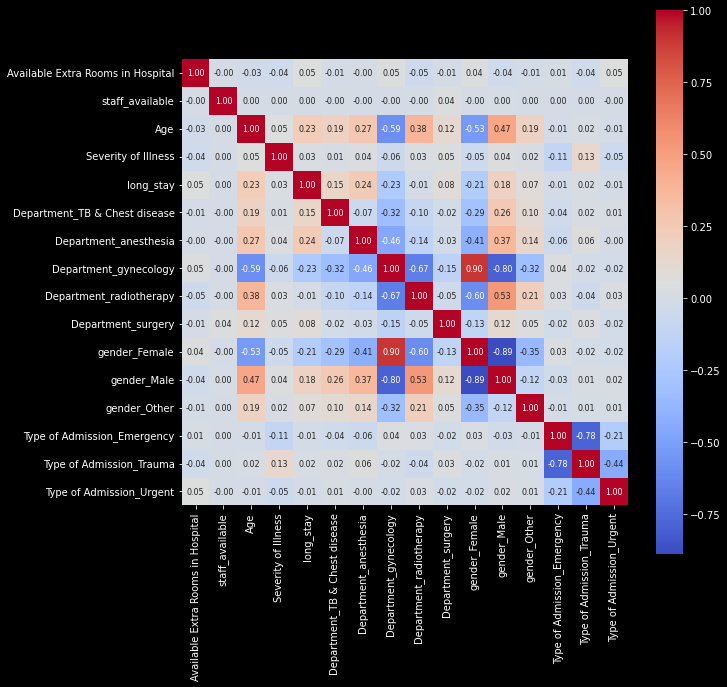

In [199]:
corr = df_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
           xticklabels= df_train.columns, 
           yticklabels= df_train.columns,
           cmap= 'coolwarm')
plt.xticks
plt.yticks
plt.show()

Notamos que hay features que no tienen correlación con los días de estadia o es ínfima. Estas columnas son: 

In [200]:
columnas = ['staff_available', 'Type of Admission_Emergency', 'Type of Admission_Trauma', 'Type of Admission_Urgent']

Vamos a eliminar estas features. También hay otras como el área de radioterapia o de cirugía que podrían ser sacadas, pero dejaremos todas las áreas de momento.

In [201]:
df_train.drop(columns=columnas, inplace=True)

In [202]:
df_train

,Available Extra Rooms in Hospital,Age,Severity of Illness,long_stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,gender_Male,gender_Other
0,4,4,2,0,0,0,1,0,0,1,0,0
1,4,3,0,1,0,0,1,0,0,1,0,0
2,2,2,2,0,0,0,1,0,0,1,0,0
3,4,3,1,0,0,0,1,0,0,1,0,0
4,2,7,1,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,3,0,0,0,0,1,0,0,1,0,0
409996,5,2,2,1,0,0,1,0,0,1,0,0
409997,4,2,0,1,0,0,1,0,0,1,0,0
409998,10,2,1,1,0,0,1,0,0,1,0,0


# Creación del modelo de ML
Con los datos ya procesados vamos a pasar a crear nuestro modelo.

Como se trata de un problema de clasificación, se propone utilizar Árboles de Decisión.

Definimos nuestras variables predictoras **X** y la etiqueta a predecir **y**, vamos a separar nuestros datos en entrenamiento y testeo. Utilizaremos el 30% del dataset para evaluar.

In [203]:
X = df_train.drop(columns=['long_stay'])
y = df_train['long_stay']

In [204]:
from sklearn.model_selection import train_test_split

# Separamos los datos de entrenamiento de los datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)


# Pipeline
Ahora realizaremos un pipeline con el modelo de Árbol de Decisión. A su vez, aplicaremos StandardScaler para estandarizar los datos, y PCA para reducir la dimensión de los features y ver si podemos mejorar los resultados.

In [205]:
# Importamos las librerías necesarias
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [206]:
# Creamos el pipeline
modelo = Pipeline([('scl', StandardScaler()),
			('pca', PCA()),
			('clf', DecisionTreeClassifier(criterion= 'entropy', max_depth= 16, max_features= 0.2, splitter= 'best', random_state=42))])

In [207]:
modelo.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA()),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=16,
                                        max_features=0.2, random_state=42))])

In [208]:
# Predecimos
y_pred=modelo.predict(X_test)


In [209]:
# Importamos las métricas utilizadas para evaluar modelos de clasificación. 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score

# Evaluamos
print(f'El Accuracy del modelo de Árbol de Decisión es: {accuracy_score(y_test,y_pred)}')
print(f'El Recall del modelo de Árbol de Decisión es: {recall_score(y_test,y_pred)}')

El Accuracy del modelo de Árbol de Decisión es: 0.6982357723577236
El Recall del modelo de Árbol de Decisión es: 0.8498807024863427


Utilizamos GridSearchCV para probar diferentes hiperparámetros. Los valores se fueron afinando en repetidas ocaciones. De los resultados obtenidos sacamos los que estamos utilizando. Estos fueron:
- criterion= 'entropy', max_depth= 15, max_features= 0.2, splitter= 'best', random_state=42

Para no ralentizar el todo el proceso, he comentado el código.

In [210]:
'''
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 10, 15, 20, 25],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

modelo = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

modelo.fit(X_train, y_train)
print(modelo.best_params_)
'''

"\nfrom sklearn.model_selection import GridSearchCV\n\nparams = {\n    'criterion':  ['gini', 'entropy'],\n    'max_depth':  [None, 10, 15, 20, 25],\n    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],\n    'splitter': ['best', 'random']\n}\n\nmodelo = GridSearchCV(\n    estimator=DecisionTreeClassifier(),\n    param_grid=params,\n    cv=5,\n    n_jobs=5,\n    verbose=1,\n)\n\nmodelo.fit(X_train, y_train)\nprint(modelo.best_params_)\n"

#### Guardado del modelo.
Procedemos a guardar el modelo:

In [211]:
import joblib

joblib.dump(modelo, 'Modelo_Arbol_de_Decision.pkl', compress=1)

['Modelo_Arbol_de_Decision.pkl']

# Uso del modelo de ML

Ahora aplicaremos todos los procesos que ya aplicamos a *hospitalizaciones_train.csv*, pero esta vez sobre el dataset *hospitalizaciones_test.csv*.

No detallaremos demasiado, ya que ya lo hicimos para el dataset de entrenamiento.

In [212]:
df_test = pd.read_csv('.\Datasets\hospitalizaciones_test.csv')

In [213]:
df_test = df_test[['Available Extra Rooms in Hospital', 'Department', 'staff_available', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions']]

In [214]:
df_test.drop(columns=['health_conditions'], inplace=True)

In [215]:
edad_cat = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
complejidad_cat = ['Minor', 'Moderate', 'Extreme']

ordinal_encoder = OrdinalEncoder(categories=[edad_cat, complejidad_cat])
df_test[['Age', 'Severity of Illness']] = ordinal_encoder.fit_transform(df_test[['Age', 'Severity of Illness']])

In [216]:
labels = ['Department', 'gender', 'Type of Admission']

ohe = OneHotEncoder(categories='auto')

labels_list = ohe.fit_transform(df_test[labels]).toarray()

ohe_labels = ohe.get_feature_names_out(labels)

new_columns = pd.DataFrame(labels_list, columns=ohe_labels)

In [217]:
df_test = df_test.join(new_columns)
df_test.drop(columns=labels, inplace=True)
df_test = df_test.astype('int64')

In [218]:
columnas = ['staff_available', 'Type of Admission_Emergency', 'Type of Admission_Trauma', 'Type of Admission_Urgent']

df_test.drop(columns=columnas, inplace=True)

In [219]:
df_test

,Available Extra Rooms in Hospital,Age,Severity of Illness,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,gender_Female,gender_Male,gender_Other
0,3,2,1,0,0,1,0,0,1,0,0
1,2,5,1,1,0,0,0,0,1,0,0
2,2,5,1,0,0,0,1,0,0,0,1
3,2,2,1,0,0,1,0,0,1,0,0
4,2,5,2,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
89995,4,1,0,0,0,1,0,0,1,0,0
89996,13,3,1,0,0,1,0,0,1,0,0
89997,2,1,1,0,0,1,0,0,1,0,0
89998,2,6,2,0,0,0,1,0,1,0,0


Una vez que tenemos nuestro dataframe listo, podemos aplicar nuestro modelo a los datos para validar. Utilizaremos el modelo del Árbol de Decisión que fue creado anteriormente.

In [220]:
modelo = joblib.load('Modelo_Arbol_de_Decision.pkl')

In [221]:
# Definimos las variables para predecir
X_test = df_test

In [222]:
# Predecimos
pred = modelo.predict(X_test)

In [223]:
# Guardamos nuestra predicción en un dataframe
df_test['pred'] = pred
df_test = df_test['pred']

In [224]:
# Vemos si está todo bien
df_test.sample(15)

12116    1
60600    1
9870     1
28124    1
26544    0
31895    1
60166    1
52939    1
48599    0
57933    1
82524    0
66632    0
42459    1
52615    1
42269    1
Name: pred, dtype: int64

In [225]:
# Exportamos nuestro dataframe a un archivo 'csv'.
df_test.to_csv('ValenteFog.csv', index=False)

**Con esto damos por concluídos todos los pasos de este proyecto.**